# Exploratory Analysis over census data for salaries from the year 1994


In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns

#For some of the date operations
import datetime
#import datetime

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
df_census.head(10)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,11/28/1994,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,3/2/1994,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,11/27/1994,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,12/25/1994,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10/10/1994,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#df_census = df.dropna()
df_census_new = df_census.replace(regex='\?', value=np.nan)
df_new_census = df_census_new.dropna()

print("Task 1-a: Details of df_census data frame are: \n", df_new_census)
num_rows = df_new_census.shape[0]
num_cols = df_new_census.shape[1]
print("\n\nTask 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 
print("\n\nTask 1-c: Descriptive details of age is \n", df_new_census['Age'].describe())
num_uniq_1 = df_new_census['education-num'].unique()
num_uniq_2 = df_new_census['hours-per-week'].unique()
print("\n\nTask 1-d: The number of unique 1### :", num_uniq_1)
print("Task 1-d: The number of unique 2### :", num_uniq_2)


Task 1-a: Details of df_census data frame are: 
              Date  Age          WorkClass  fnlwgt      education  \
0       3/20/1994   39          State-gov   77516      Bachelors   
1       1/14/1994   50   Self-emp-not-inc   83311      Bachelors   
2       8/14/1994   38            Private  215646        HS-grad   
3       3/17/1994   53            Private  234721           11th   
4       9/20/1994   28            Private  338409      Bachelors   
5      11/28/1994   37            Private  284582        Masters   
6        3/2/1994   49            Private  160187            9th   
7      11/27/1994   52   Self-emp-not-inc  209642        HS-grad   
8      12/25/1994   31            Private   45781        Masters   
9      10/10/1994   42            Private  159449      Bachelors   
10     10/29/1994   37            Private  280464   Some-college   
11     11/10/1994   30          State-gov  141297      Bachelors   
12       1/4/1994   23            Private  122272      Bachelors   

In [4]:
new_df = df_new_census.groupby('education')['capital-gain']
hd = new_df.groups

hs_grad = new_df.get_group(' HS-grad')
bach_grad = new_df.get_group(' Bachelors')
sum_capital_gain_bachelors = bach_grad.sum()
sum_capital_gain_HS_Grad = hs_grad.sum()


print ("Task 2-a: The sum of capital gain for education level as bachelors is %s and as HS-Grad is %s"% (sum_capital_gain_bachelors, sum_capital_gain_HS_Grad))
df_new_census['Survey_Month'] = pd.DatetimeIndex(df_new_census['Date']).month
#print(df_new_census)
may_surveys = df_new_census[df_new_census['Survey_Month'] == 5]
october_surveys = df_new_census[df_new_census['Survey_Month'] == 10]
#df_new_census[(df_new_census['Survey_Month'] == 9)&(df_new_census['Age'] < 50) & (df_new_census['WorkClass'] == ' Private')]
december_surveys = df_new_census[df_new_census['Survey_Month'] == 8]
num_surveys_may = may_surveys.shape[0]
num_surveys_october = october_surveys.shape[0]
num_surveys_december = december_surveys.shape[0]
print ("\n\nTask 2-b: The total number of surveys in may is %s, in october is %s, and in december is %s" % (num_surveys_may, num_surveys_october, num_surveys_december))

september_survey = df_new_census[(df_new_census['Survey_Month'] == 9)&(df_new_census['Age'] < 50) & (df_new_census['WorkClass'] == ' Private')]
november_survey = df_new_census[(df_new_census['Survey_Month'] == 11)&(df_new_census['Age'] < 50) & (df_new_census['WorkClass'] == ' Private')]

num_surveys_september = september_survey.shape[0]
num_surveys_november = november_survey.shape[0]
print ("\n\nTask 2-c: The total number of surveys that meet the given conditions in september is %s and in november is %s" % (num_surveys_september, num_surveys_november))

Jan_June_survey = df_new_census[(df_new_census['Survey_Month'] >= 1)&(df_new_census['Survey_Month'] <= 6)]
July_December_survey = df_new_census[(df_new_census['Survey_Month'] >= 7)&(df_new_census['Survey_Month'] <= 12)]
JD_survey = July_December_survey.groupby('education')['Survey_Month']
JJ_survey = Jan_June_survey.groupby('education')['Survey_Month']
#print(JD_survey)
cbmn_dic = []
lokp_dic = []
kj_sur = JJ_survey.count() # JJ
jd_sur = JD_survey.count() # JD
lok = pd.Series(jd_sur) #JD
cgf = pd.Series(kj_sur) #JJ
for ktb, bhej in lok.items():
    cbmn_dic.append((bhej, ktb)) #JD
cbmn_dic.sort()
for kth, bhejio in cgf.items():
    lokp_dic.append((bhejio, ktb)) #JJ
lokp_dic.sort()
jj_lis = lokp_dic[:3]
jd_lis = cbmn_dic[:3]



top3_least_surveyed_Jan_June = jj_lis
top3_least_surveyed_July_December = jd_lis
print ("\n\nTask 2-d: \nThe top 3 least surveyed education categories in January-June: \n%s \n\nThe top 3 least surveyed education categories in July-December: \n%s" % (top3_least_surveyed_Jan_June,top3_least_surveyed_July_December))



com_dic = {}
nyc_li, myc_li = [], []
opt = df_new_census[['native-country', 'class']]
#plad = opt[ksl['class'] == ' >50K']
grp_lk = opt.groupby('native-country')['class']
cmr = pd.Series(grp_lk.count())
for khb, bhj in cmr.items():
    com_dic[khb] = bhj
del com_dic[' United-States']
#print(com_dic)
#print(c_dic)
c_lop_li = []
for iexd_c, vla_c in com_dic.items():
    tup = (vla_c, iexd_c)
    #tup.append(val_c)
    c_lop_li.append(tup)

c_lop_li.sort(reverse=True)

t_51 = dict(c_lop_li[:5])

for gh,gk in t_51.items():
    nyc_li.append(gk)
    myc_li.append(gh)

top5_most_surveyed_native_countries = nyc_li
print ("\n\nTask 2-e: \nThe top 5 most surveyed native countries : \n%s" % (top5_most_surveyed_native_countries))

c_dic = {}
myk_li, mkj_li = [], []
ksl = df_new_census[['native-country', 'class']]
pol = ksl[ksl['class'] == ' >50K']
grt_df = pol.groupby('native-country')['class']
cdr = pd.Series(grt_df.count())
for ke, be in cdr.items():
    c_dic[ke] = be
#print(c_dic)
c_pol_li = []
for iex_c, vl_c in c_dic.items():
    tup = (vl_c, iex_c)
    #tup.append(val_c)
    c_pol_li.append(tup)

c_pol_li.sort(reverse=True)
t_5 = dict(c_pol_li[:5])
#print(top_five)
for gh,gk in t_5.items():
    myk_li.append(gk)
    mkj_li.append(gh)
#print(val_li)
#print(myk_li)
top5_native_countries = myk_li
print ("\n\nTask 2-f: \nThe top 5 native countries with the most number of surveys with class >50K: \n%s"  % (top5_native_countries))


Task 2-a: The sum of capital gain for education level as bachelors is 8751485 and as HS-Grad is 5799557


Task 2-b: The total number of surveys in may is 2510, in october is 2510, and in december is 2514


Task 2-c: The total number of surveys that meet the given conditions in september is 1465 and in november is 1507


Task 2-d: 
The top 3 least surveyed education categories in January-June: 
[(19, ' Some-college'), (74, ' Some-college'), (156, ' Some-college')] 

The top 3 least surveyed education categories in July-December: 
[(26, ' Preschool'), (77, ' 1st-4th'), (132, ' 5th-6th')]


Task 2-e: 
The top 5 most surveyed native countries : 
[' Mexico', ' Philippines', ' Germany', ' Puerto-Rico', ' Canada']


Task 2-f: 
The top 5 native countries with the most number of surveys with class >50K: 
[' United-States', ' Philippines', ' Germany', ' India', ' Canada']


C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

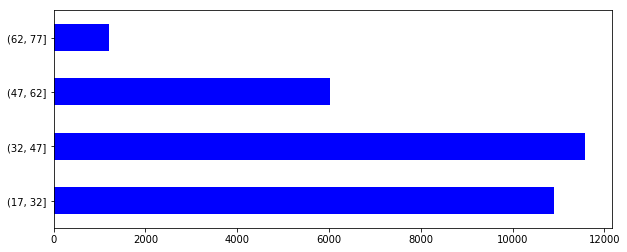

{' Cambodia': 7, ' Canada': 36, ' China': 20, ' Columbia': 2, ' Cuba': 25, ' Dominican-Republic': 2, ' Ecuador': 4, ' El-Salvador': 9, ' England': 30, ' France': 12, ' Germany': 44, ' Greece': 8, ' Guatemala': 3, ' Haiti': 4, ' Honduras': 1, ' Hong': 6, ' Hungary': 3, ' India': 40, ' Iran': 18, ' Ireland': 5, ' Italy': 24, ' Jamaica': 10, ' Japan': 23, ' Laos': 2, ' Mexico': 33, ' Nicaragua': 2, ' Peru': 2, ' Philippines': 60, ' Poland': 11, ' Portugal': 4, ' Puerto-Rico': 12, ' Scotland': 2, ' South': 14, ' Taiwan': 19, ' Thailand': 3, ' Trinadad&Tobago': 2, ' United-States': 6995, ' Vietnam': 5, ' Yugoslavia': 6}
{' 10th': 59, ' 11th': 59, ' 12th': 29, ' 1st-4th': 6, ' 5th-6th': 12, ' 7th-8th': 35, ' 9th': 25, ' Assoc-acdm': 256, ' Assoc-voc': 344, ' Bachelors': 2126, ' Doctorate': 280, ' HS-grad': 1617, ' Masters': 918, ' Prof-school': 406, ' Some-college': 1336}


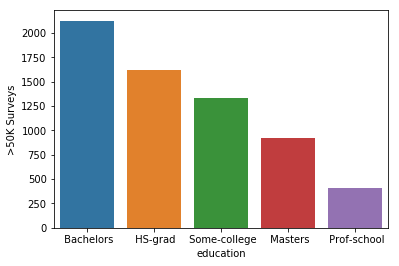

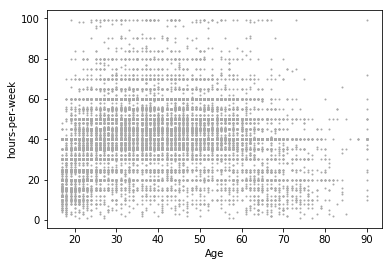

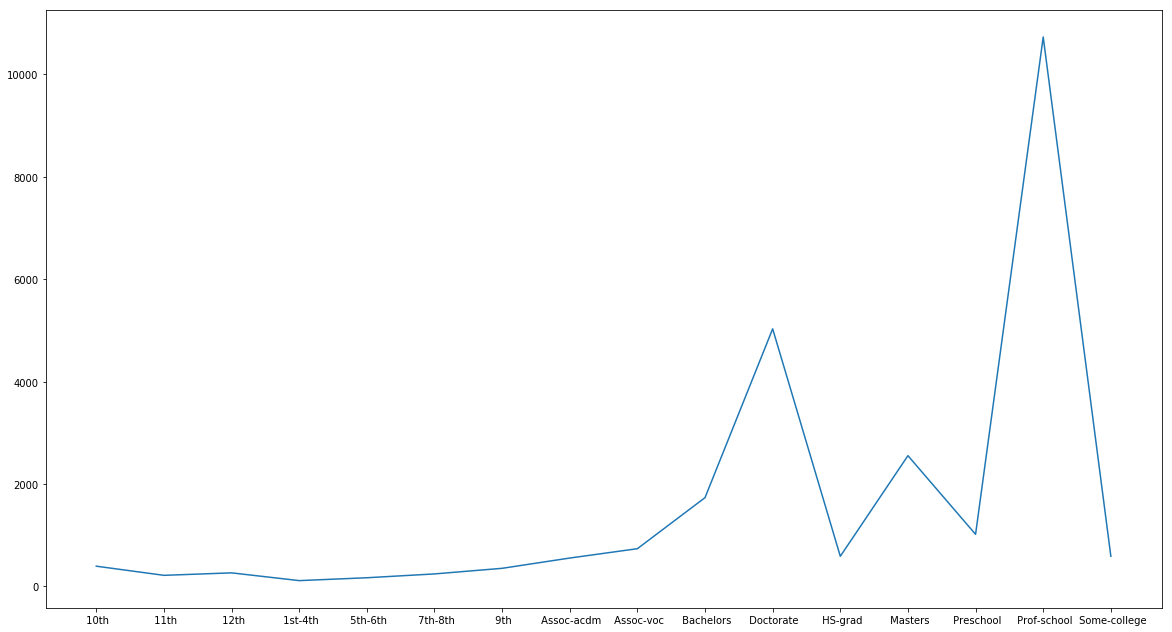

{' Adm-clerical': 3721, ' Armed-Forces': 9, ' Craft-repair': 4030, ' Exec-managerial': 3992, ' Farming-fishing': 989, ' Handlers-cleaners': 1350, ' Machine-op-inspct': 1966, ' Other-service': 3212, ' Priv-house-serv': 143, ' Prof-specialty': 4038, ' Protective-serv': 644, ' Sales': 3584, ' Tech-support': 912, ' Transport-moving': 1572}
{' Federal-gov': 943, ' Local-gov': 2067, ' Private': 22286, ' Self-emp-inc': 1074, ' Self-emp-not-inc': 2499, ' State-gov': 1279, ' Without-pay': 14}


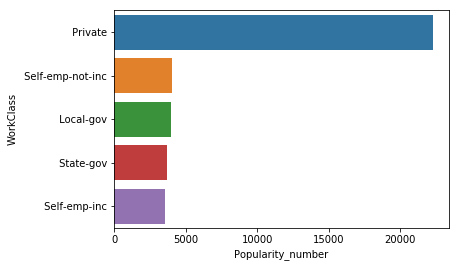

In [12]:


df_new_census['Total'] = df_new_census['Survey_Month'].count()
mydf = df_new_census[['Survey_Month', 'Total']]
#print(mydf)
'''
'''
#sns.set(style="darkgrid")
#comment this line to get the output of any of the visualization.
#ax = sns.countplot(x="Survey_Month", data=mydf)
#print(ax)
#########################end code for Task 3-a



mdf = df_new_census[['Survey_Month', 'gender']]
nums = mdf.count()
#print("The nums is: ", nums)
newli = []
main_month = df_new_census['Survey_Month']
#print(main_month)
for j in np.nditer(main_month):
    if(j == 1):
        newli.append('January')
    elif(j == 2):
        newli.append('Febuary')
    elif(j == 3):
        newli.append('March')
    elif(j == 4):
        newli.append('April')
    elif(j == 5):
        newli.append('May')
    elif(j == 6):
        newli.append('June')
    elif(j == 7):
        newli.append('July')
    elif(j == 8):
        newli.append('August')
    elif(j == 9):
        newli.append('September')
    elif(j == 10):
        newli.append('October')
    elif(j == 11):
        newli.append('November')
    elif(j == 12):
        newli.append('December')
    else:
        break

        
#print(newli)
mdf['Month'] = newli
mdf['Total'] = mdf['gender'].count()
mdf['Month'] = mdf['Month']
#print(mdf)
uniarr = np.unique(newli)
plt.figure(figsize=(20,11))
#cx = sns.barplot(x="Month", y="Total", data=mdf, ci=90, order=uniarr)





df_new_census['New_total'] = df_new_census['Age'].count()
#print("total: ", df_new_census)
minimum_age = df_new_census['Age'].min()
maximum_age = df_new_census['Age'].max()
rangelist = []
rng = []
for k in range(minimum_age, maximum_age+1, 15):
    rng.append(k)

for i in np.nditer(df_new_census['Age']):
    rangelist.append(i+15)
    
out = pd.cut(df_new_census['Age'], bins=rng)
ax = out.value_counts(sort=False).plot.barh(rot=0, color="b", figsize=(10,4))
plt.show()



#########################end code for Task 3-c



count_dict = {}
key_li, val_li = [], []
kdf = df_new_census[['native-country', 'class']]
hdf = kdf[kdf['class'] == ' >50K']
grouped_df = hdf.groupby('native-country')['class']
c = pd.Series(grouped_df.count())
for key, b in c.items():
    count_dict[key] = b
print(count_dict)
countli = []
for index_c, val_c in count_dict.items():
    tup = (val_c, index_c)
    #tup.append(val_c)
    countli.append(tup)

countli.sort(reverse=True)
top_five = dict(countli[:5])
#print(top_five)
for j,k in top_five.items():
    key_li.append(k)
    val_li.append(j)
#print(val_li)

#print(type(c))
kld = pd.DataFrame()
kld['Countries'] = key_li
kld['>50K Surveys'] = val_li


'''
Mean = grp50.count()
print(Mean)
countli = []
for lm in np.nditer(Mean):
    countli.append(lm)
'''

        
    

mydic = {}
k_li, v_li = [], []
education = df_new_census[['education', 'class']]
retdf = education[education['class'] == ' >50K']
groups_df = retdf.groupby('education')['class']
c1 = pd.Series(groups_df.count())
for ky, ce in c1.items():
    mydic[ky] = ce
print(mydic)
mycountli = []
for i_c, v_c in mydic.items():
    tup = (v_c, i_c)
    #tup.append(val_c)
    mycountli.append(tup)

mycountli.sort(reverse=True)
my_top_five = dict(mycountli[:5])
#print(top_five)
for j,k in my_top_five.items():
    k_li.append(k)
    v_li.append(j)
#print(val_li)

#print(type(c))
kmd = pd.DataFrame()
kmd['education'] = k_li
kmd['>50K Surveys'] = v_li
kmx = sns.barplot(x="education", y=">50K Surveys", data=kmd)

df_new_census.plot(kind='scatter', x='Age', y='hours-per-week', c=['darkgray'], s=1)

kdf = df_new_census.groupby('education')['capital-gain']
hd = kdf.groups
key_li = []
values_li = []
for t in hd.keys():
    key_li.append(t)
for l in np.nditer(kdf.mean()):
    values_li.append(l)

    

kl = kdf.mean()
#print(type(kl))
#print(kl)
plt.figure(figsize=(20,11))
plt.plot(sorted(df_new_census['education'].unique()), values_li)
plt.show()

dic = {}
index_li, value_li = [], []
occu = df_new_census[['occupation', 'Total']]
#retdf = education[education['class'] == ' >50K']
groups_df = occu.groupby('occupation')['Total']
education = groups_df.count()

cn = pd.Series(education)
for ki, ci in cn.items():
    dic[ki] = ci
print(dic)
cli = []
for id_c, vl_c in dic.items():
    tup = (vl_c, id_c)
    #tup.append(val_c)
    cli.append(tup)

cli.sort(reverse=True)
myt = dict(cli[:5])
#print(top_five)
for j,k in myt.items():
    index_li.append(k)
    value_li.append(j)
#print(val_li)

#print(type(c))
ksd = pd.DataFrame()
ksd['occupation'] = index_li
ksd['Popularity_number'] = value_li
jhg = sns.barplot(x="Popularity_number", y="occupation", data=ksd)

di = {}
ind_li, va_li = [], []
work = df_new_census[['WorkClass', 'Total']]
#retdf = education[education['class'] == ' >50K']
work_grp = work.groupby('WorkClass')['Total']
work_class = work_grp.count()

nb = pd.Series(work_class)
for ka, ca in nb.items():
    di[ka] = ca
print(di)
cl = []
for idx_c, vla_c in di.items():
    tup = (vla_c, idx_c)
    #tup.append(val_c)
    cl.append(tup)

cl.sort(reverse=True)
myd = dict(cl[:5])
#print(top_five)
for kv,kd in myd.items():
    ind_li.append(kd)
    va_li.append(kv)
#print(val_li)

#print(type(c))
kjb = pd.DataFrame()
kjb['WorkClass'] = ind_li
kjb['Popularity_number'] = va_li
#print(kjb)
jhg = sns.barplot(x="Popularity_number", y="WorkClass", data=kjb)
#kmx = sns.barplot(x="education", y=">50K Surveys", data=kmd)







# Task 4: 
Find out an interesting information from your census1994 dataset. Create a visualization for it. 
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visulization). 

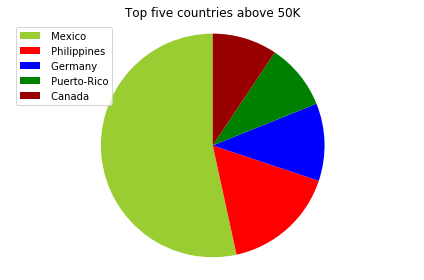

In [6]:
com_dic = {}
nyc_li, myc_li = [], []
opt = df_new_census[['native-country', 'class']]
#plad = opt[ksl['class'] == ' >50K']
grp_lk = opt.groupby('native-country')['class']
cmr = pd.Series(grp_lk.count())
for khb, bhj in cmr.items():
    com_dic[khb] = bhj
del com_dic[' United-States']
#print(com_dic)
#print(c_dic)
c_lop_li = []
for iexd_c, vla_c in com_dic.items():
    tup = (vla_c, iexd_c)
    #tup.append(val_c)
    c_lop_li.append(tup)

c_lop_li.sort(reverse=True)
#print(c_omg_li)
#c_omg_li.remove('United States')
t_51 = dict(c_lop_li[:5])
#print(top_five)
for gh,gk in t_51.items():
    nyc_li.append(gk)
    myc_li.append(gh)
#print(nyc_li)
#print(nyc_li)

labels = nyc_li
sizes = myc_li
colors = ['yellowgreen', 'red', 'Blue', 'green', '#990000']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Top five countries above 50K')
plt.tight_layout()
plt.show()